In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import cv2
import pathlib

# Download the Dataset and Store it into a Directory

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file(fname='flower_photos', origin=dataset_url,  cache_dir='.', cache_subdir='flower_dataset', untar=True)
# cache_dir indicates where to download data. I specified '.' which means the current directory named 'datasets'
# untar=true will unzip it

In [3]:
type(data_dir), data_dir

(str, './flower_dataset/flower_photos')

In [4]:
flower_dir = pathlib.Path(data_dir)
# When you convert data_dir to a pathlib.Path object,
# you gain the flexibility and power of the pathlib module to work with the file system
type(flower_dir), flower_dir

(pathlib.PosixPath, PosixPath('flower_dataset/flower_photos'))

# File Paths

In [5]:
flower_dir.glob('*/*.jpg')  # an object of paths of all images in each sub-dir

<generator object Path.glob at 0x7d3f6b50bae0>

In [6]:
flower_paths = list(flower_dir.glob('*/*.jpg'))
# turns an object into a list containing paths
flower_paths[:5]

[PosixPath('flower_dataset/flower_photos/dandelion/15782158700_3b9bf7d33e_m.jpg'),
 PosixPath('flower_dataset/flower_photos/dandelion/14053397367_75cba846eb_n.jpg'),
 PosixPath('flower_dataset/flower_photos/dandelion/479495978_ee22cf05be.jpg'),
 PosixPath('flower_dataset/flower_photos/dandelion/3418355347_2bdcca592a.jpg'),
 PosixPath('flower_dataset/flower_photos/dandelion/16716172029_2166d8717f_m.jpg')]

In [7]:
flower_paths = {
    'roses': list(flower_dir.glob('roses/*.jpg')),
    'daisy': list(flower_dir.glob('daisy/*.jpg')),
    'dandelion': list(flower_dir.glob('dandelion/*.jpg')),
    'sunflowers': list(flower_dir.glob('sunflowers/*.jpg')),
    'tulips': list(flower_dir.glob('tulips/*.jpg')),
}

In [8]:
for i in flower_paths.keys():
    print('{:<11}: {}'.format(i, len(flower_paths[i])))

roses      : 641
daisy      : 633
dandelion  : 898
sunflowers : 699
tulips     : 799


# Show Images

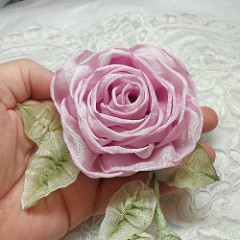

In [9]:
im = Image.open(str(flower_paths['roses'][2]))  # converts type from WindowsPath to str
im

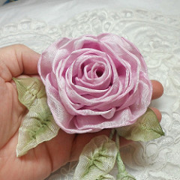

In [10]:
im.resize(size=(180, 180))

# Data Preprocessing

In [11]:
for i in flower_paths.keys():
    for j in range(2):
        print(cv2.imread(str(flower_paths[i][j])).shape)  # images have different shapes

(333, 500, 3)
(224, 320, 3)
(213, 320, 3)
(240, 192, 3)
(240, 180, 3)
(240, 320, 3)
(240, 240, 3)
(213, 320, 3)
(213, 320, 3)
(333, 500, 3)


In [12]:
labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
X = []  # contains arrays
Y = []  # contains label for each flower

for flower_type, paths in flower_paths.items():
    for path in paths:
        arr = cv2.imread(str(path))
        resized_arr = cv2.resize(arr, (180, 180))
        X.append(resized_arr)
        Y.append(labels[flower_type])

In [14]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((3670, 180, 180, 3), (3670,))

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train)

Y_train.shape, Y_val.shape, Y_test.shape

((2972,), (331,), (367,))

In [16]:
np.unique(Y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([519, 513, 727, 566, 647]))

In [17]:
np.unique(Y_val, return_counts=True)

(array([0, 1, 2, 3, 4]), array([58, 57, 81, 63, 72]))

In [18]:
np.unique(Y_test, return_counts=True)

(array([0, 1, 2, 3, 4]), array([64, 63, 90, 70, 80]))

In [19]:
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255
X_test_scaled = X_test / 255

# Training

### Without Augmentation

In [20]:
Model_without_Augmenter = keras.Sequential([
    # CNN
    keras.layers.Input(shape=(180, 180, 3)),
    keras.layers.Conv2D(filters=18, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=72, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])

Model_without_Augmenter.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 18)        │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 36)          │           5,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 72)          │          23,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 72)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 34848)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,460,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,491,089 (17.13 MB)

 Trainable params: 4,491,089 (17.13 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Model_without_Augmenter.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

Model_without_Augmenter.fit(X_train_scaled, Y_train, batch_size=64, epochs=20, validation_data=(X_val_scaled, Y_val))

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - accuracy: 0.3164 - loss: 1.6286 - val_accuracy: 0.5257 - val_loss: 1.0880
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5546 - loss: 1.0757 - val_accuracy: 0.6284 - val_loss: 0.9893
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6457 - loss: 0.9163 - val_accuracy: 0.6737 - val_loss: 0.8621
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7396 - loss: 0.7267 - val_accuracy: 0.6737 - val_loss: 0.8472
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8057 - loss: 0.5275 - val_accuracy: 0.6556 - val_loss: 0.9329
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8885 - loss: 0.3399 - val_accuracy: 0.6647 - val_loss: 1.0133
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9093 - loss: 0.2567 - val_accuracy: 0.6405 - val_loss: 1.1008
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9531 - loss: 0.1668 - val_accuracy: 0.6798 -

In [22]:
Model_without_Augmenter.evaluate(X_test_scaled, Y_test)  # OVERFIT!!!

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6143 - loss: 2.7521


[2.6114020347595215, 0.6239781975746155]

In [23]:
proba_1 = Model_without_Augmenter.predict(X_test_scaled)
Yp_test_1 = np.array([np.argmax(i) for i in proba_1])
Yp_test_1.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


(367,)

In [24]:
cr_1 = classification_report(Y_test, Yp_test_1)

In [25]:
cm_1 = confusion_matrix(Y_test, Yp_test_1)
display_cm1 = ConfusionMatrixDisplay(cm_1, display_labels=list(labels.keys()))

### Using Augmentation

https://keras.io/api/layers/preprocessing_layers

In [26]:
augmenter = keras.Sequential()
augmenter.add(keras.layers.RandomZoom(height_factor=(-0.25, 0.25), width_factor=(-0.25, 0.25)))
augmenter.add(keras.layers.RandomFlip(mode='horizontal'))
augmenter.add(keras.layers.RandomRotation(factor=(-0.25, 0.25)))
augmenter.add(keras.layers.RandomContrast(factor=0.25))

In [27]:
augmented_tensor = augmenter(X_train_scaled[:30])
augmented_tensor.shape

TensorShape([30, 180, 180, 3])

In [28]:
augmented_arr = np.array(augmented_tensor[0])
augmented_arr.dtype

dtype('float32')

In [29]:
def clip_image(image):
    if image.dtype == np.float32 or image.dtype == np.float64:
        return np.clip(image, 0.0, 1.0)

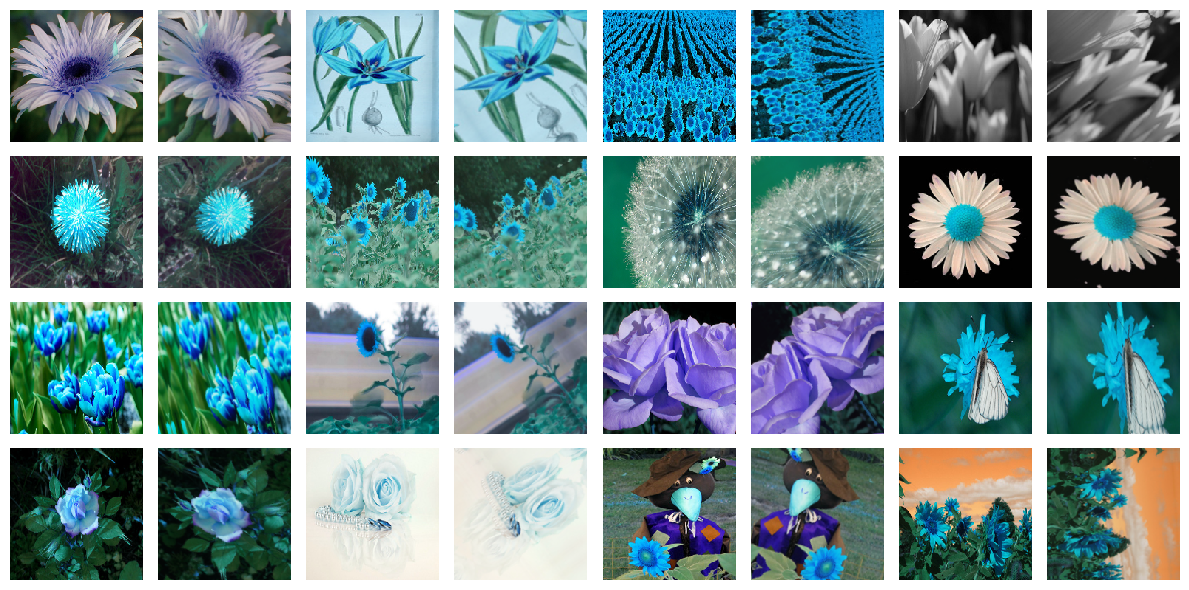

In [30]:
fig, subs = plt.subplots(ncols=8, nrows=4, figsize=(12, 6))

images = []
for i in range(16):
    images.append(X_train_scaled[i+5])
    images.append(augmented_tensor[i+5])

for ax, img in zip(subs.flatten(), images):
    ax.matshow(clip_image(img))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [31]:
Model_with_Augmenter = keras.Sequential([
    keras.layers.Input(shape=(180, 180, 3)),
    # Augment Data
    augmenter,
    # CNN
    keras.layers.Conv2D(filters=18, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=72, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])

Model_with_Augmenter.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 18)        │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 36)          │           5,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 72)          │          23,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 72)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 34848)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,460,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,491,089 (17.13 MB)

 Trainable params: 4,491,089 (17.13 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
Model_with_Augmenter.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

Model_with_Augmenter.fit(X_train_scaled, Y_train, batch_size=64, epochs=20, validation_data=(X_val_scaled, Y_val))

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.3157 - loss: 1.6633 - val_accuracy: 0.5136 - val_loss: 1.1198
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.4941 - loss: 1.1810 - val_accuracy: 0.5921 - val_loss: 1.0092
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5730 - loss: 1.0779 - val_accuracy: 0.6193 - val_loss: 0.9491
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5987 - loss: 1.0200 - val_accuracy: 0.6435 - val_loss: 0.9282
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6196 - loss: 1.0113 - val_accuracy: 0.6254 - val_loss: 0.9137
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6171 - loss: 0.9633 - val_accuracy: 0.6375 - val_loss: 0.8604
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6435 - loss: 0.9137 - val_accuracy: 0.6858 - val_loss: 0.8196
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6603 - loss: 0.8781 - val_accuracy: 0.6616 - v

In [33]:
Model_with_Augmenter.evaluate(X_test_scaled, Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7419 - loss: 0.6997


[0.68555748462677, 0.7329699993133545]

In [34]:
proba_2 = Model_with_Augmenter.predict(X_test_scaled)
Yp_test_2 = np.array([np.argmax(i) for i in proba_2])
Yp_test_2.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(367,)

In [35]:
cr_2 = classification_report(Y_test, Yp_test_2)

In [36]:
cm_2 = confusion_matrix(Y_test, Yp_test_2)
display_cm2 = ConfusionMatrixDisplay(cm_2, display_labels=list(labels.keys()))

# Compare

Text(0, 0.5, 'True label')

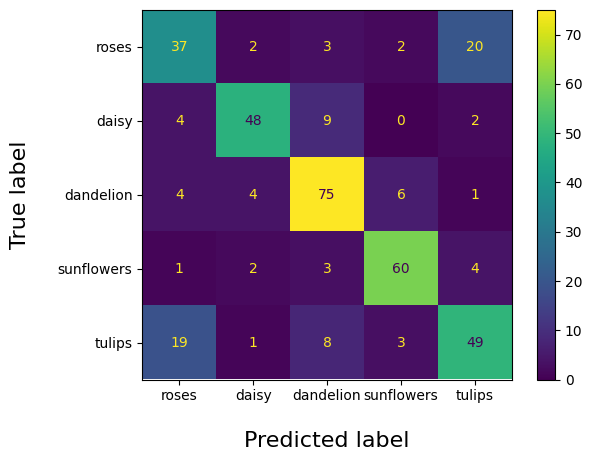

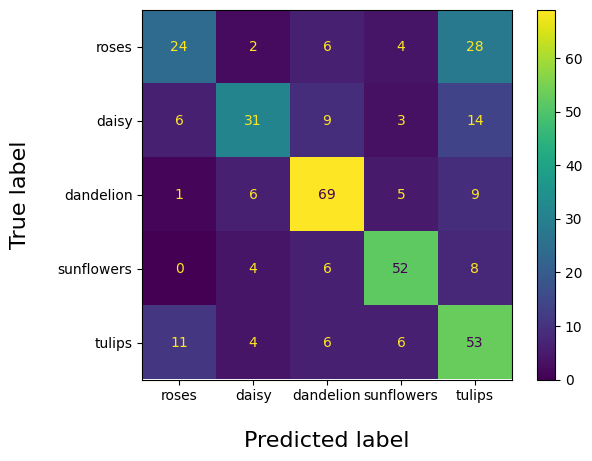

In [37]:
display_cm2.plot()
plt.xlabel('Predicted label', fontsize=16, labelpad=20)
plt.ylabel('True label', fontsize=16, labelpad=20)

display_cm1.plot()
plt.xlabel('Predicted label', fontsize=16, labelpad=20)
plt.ylabel('True label', fontsize=16, labelpad=20)

In [38]:
print(cr_2)
print('-'*100)
print(cr_1)

              precision    recall  f1-score   support

           0       0.57      0.58      0.57        64
           1       0.84      0.76      0.80        63
           2       0.77      0.83      0.80        90
           3       0.85      0.86      0.85        70
           4       0.64      0.61      0.63        80

    accuracy                           0.73       367
   macro avg       0.73      0.73      0.73       367
weighted avg       0.73      0.73      0.73       367

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.38      0.45        64
           1       0.66      0.49      0.56        63
           2       0.72      0.77      0.74        90
           3       0.74      0.74      0.74        70
           4       0.47      0.66      0.55        80

    accuracy                           0.62       367
   macro avg       0.63      0

# View Feature Maps

### Build Pre-trained Model

In [39]:
layers = Model_without_Augmenter.layers
layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [40]:
outputs = [i.output for i in layers[0:6]]
outputs

[<KerasTensor shape=(None, 180, 180, 18), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 90, 90, 18), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 90, 90, 36), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 45, 45, 36), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 45, 45, 72), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 22, 22, 72), dtype=float32, sparse=False, name=keras_tensor_6>]

In [41]:
input = layers[0].input
input

<KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=None, name=keras_tensor>

In [42]:
pretrained_model = keras.models.Model(inputs=input, outputs=outputs)
pretrained_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 18)        │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 36)          │           5,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 72)          │          23,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 72)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,772 (116.30 KB)

 Trainable params: 29,772 (116.30 KB)

 Non-trainable params: 0 (0.00 B)

### Predict an Image based on Pre-trained Model

In [43]:
path = str(flower_paths['sunflowers'][11])
path

'flower_dataset/flower_photos/sunflowers/3681233294_4f06cd8903.jpg'

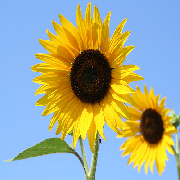

In [44]:
img = keras.preprocessing.image.load_img(path, target_size=(180, 180))
img

In [45]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add dimension to convert into training set including 1 sample
img_array.shape

TensorShape([1, 180, 180, 3])

In [46]:
img_array = augmenter(img_array)  # if you want
img_array.shape

TensorShape([1, 180, 180, 3])

In [47]:
feature_maps = pretrained_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


In [48]:
len(feature_maps)

6

In [49]:
map1 = feature_maps[1]
map2 = feature_maps[3]
map3 = feature_maps[5]
map1.shape, map2.shape, map3.shape

((1, 90, 90, 18), (1, 45, 45, 36), (1, 22, 22, 72))

### Visualize Feature Maps

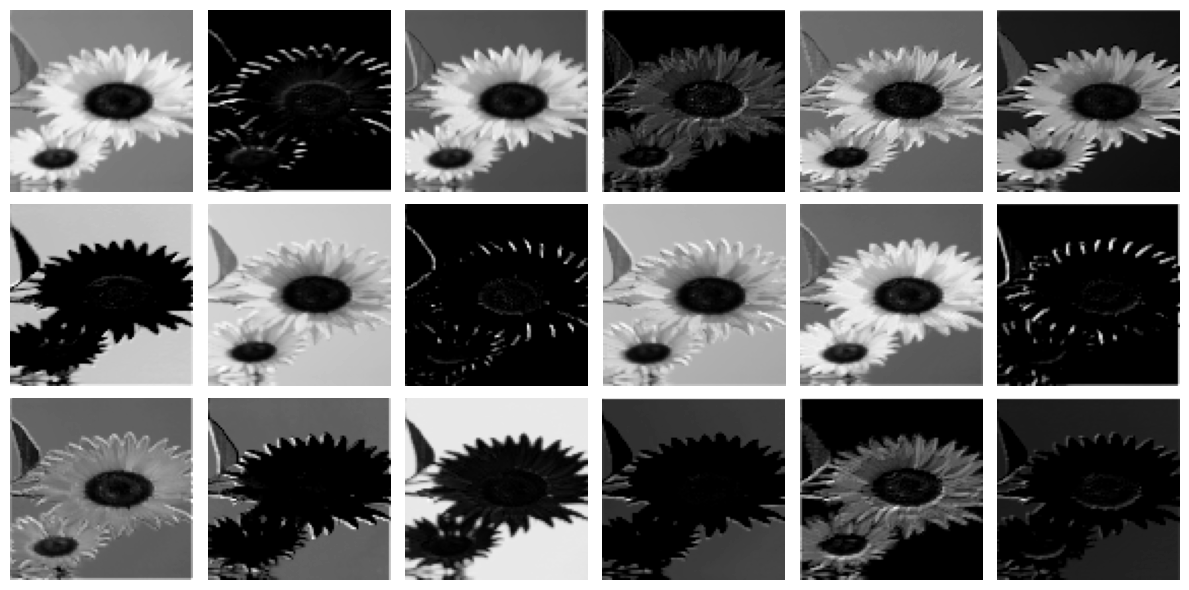

In [50]:
fig, axes = plt.subplots(3, 6, figsize=(12, 6))
axes = axes.flatten()

for i in range(0, 18):
  feature_map = map1[0, :, :, i]

  axes[i].imshow(feature_map, cmap='gray')
  axes[i].axis('off')

plt.tight_layout()
plt.show()

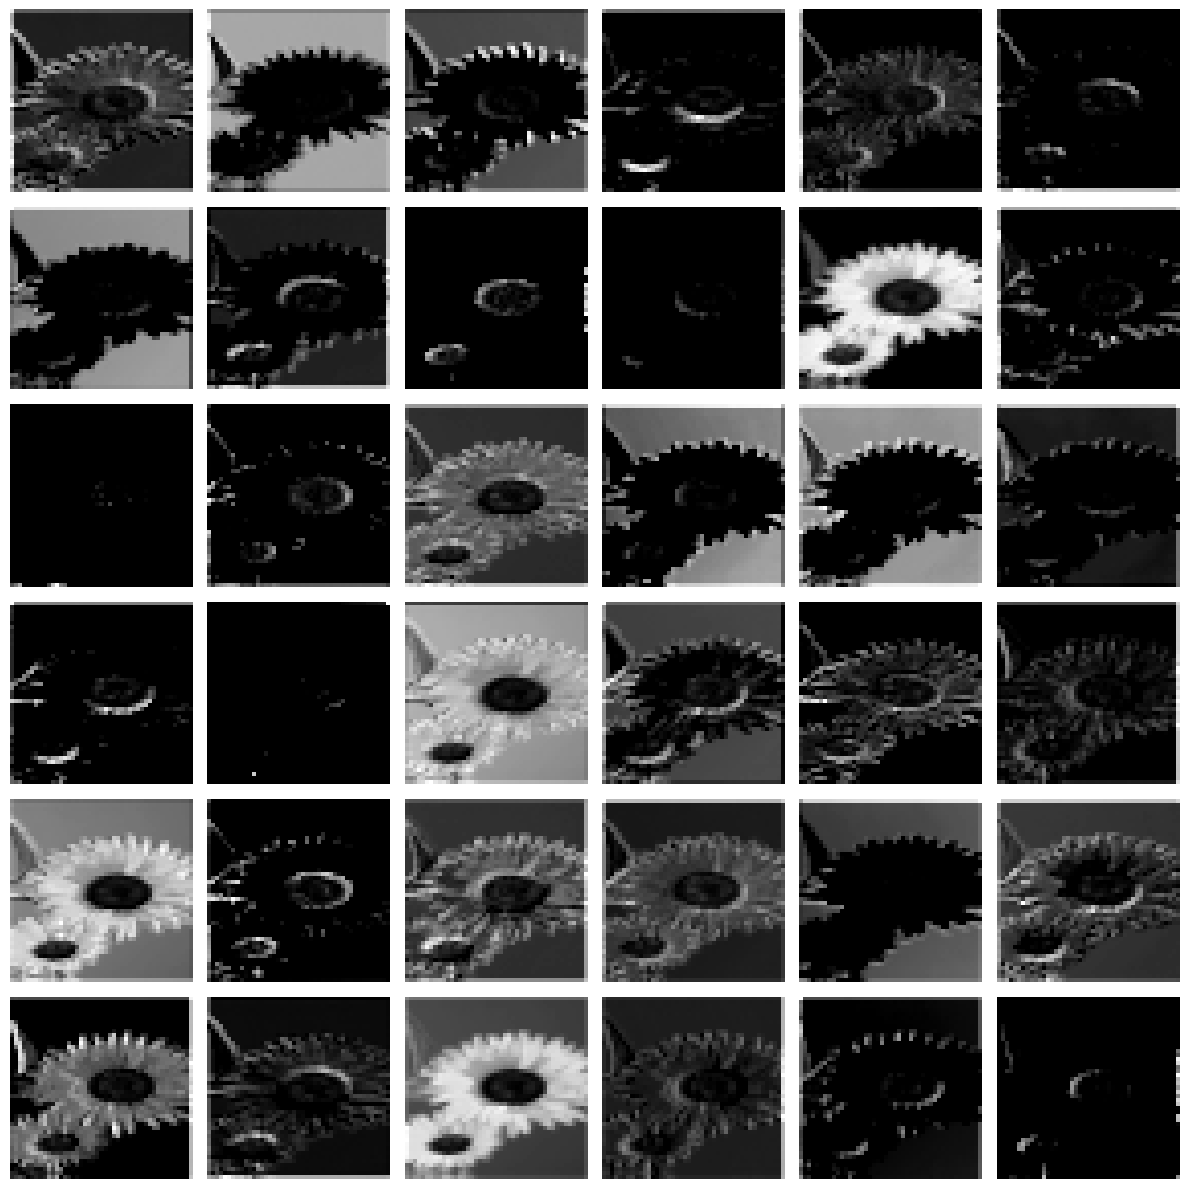

In [51]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.flatten()

for i in range(0, 36):
  feature_map = map2[0, :, :, i]

  axes[i].imshow(feature_map, cmap='gray')
  axes[i].axis('off')

plt.tight_layout()
plt.show()

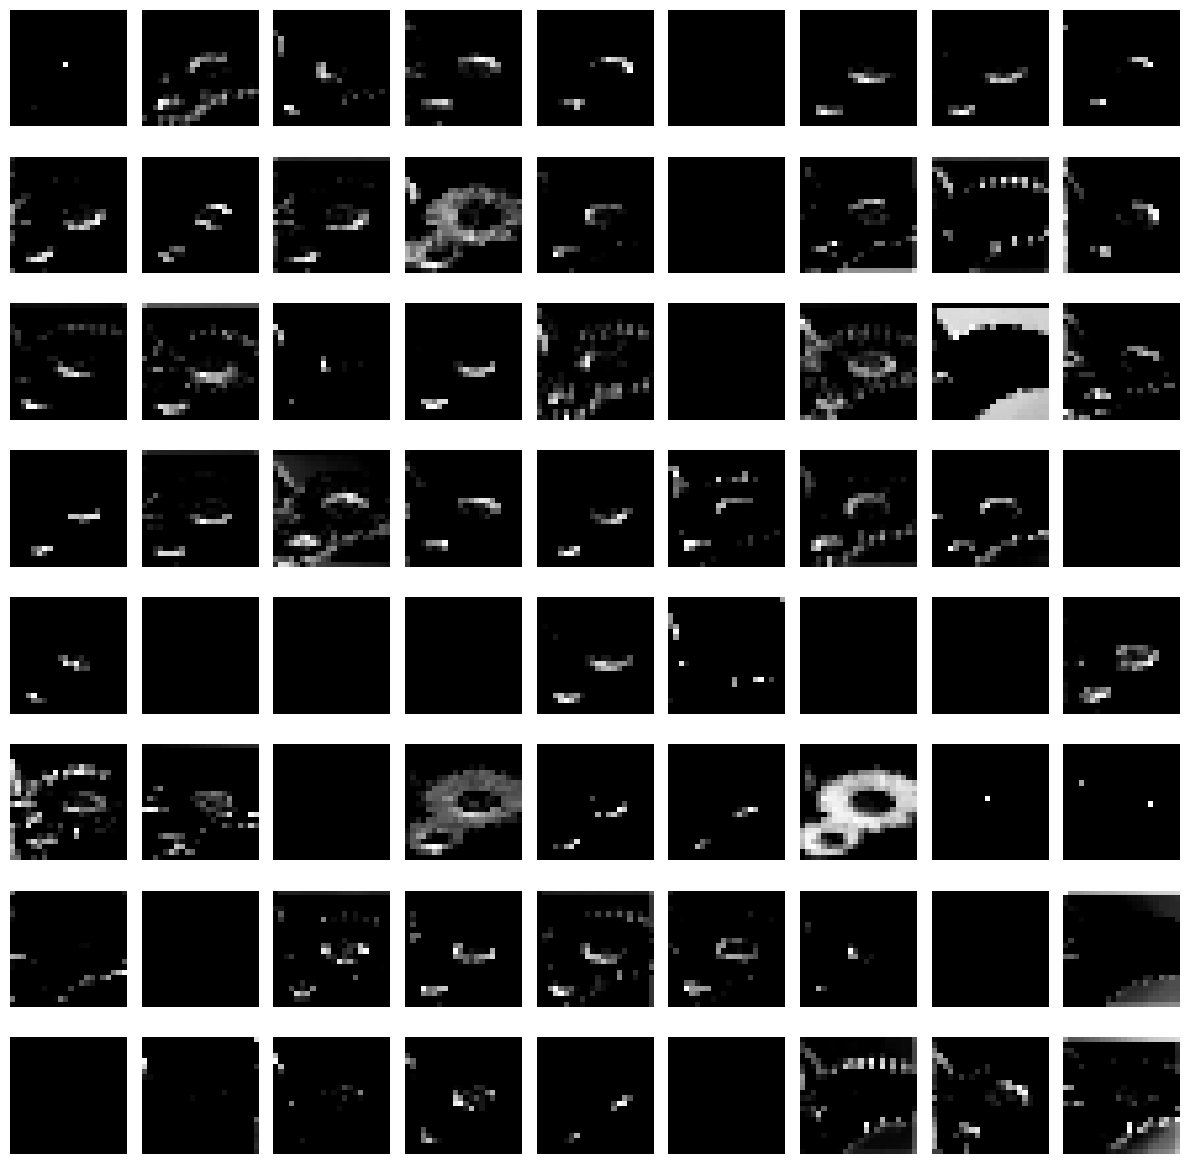

In [52]:
fig, axes = plt.subplots(8, 9, figsize=(12, 12))
axes = axes.flatten()

for i in range(0, 72):
  feature_map = map3[0, :, :, i]

  axes[i].imshow(feature_map, cmap='gray')
  axes[i].axis('off')

plt.tight_layout()
plt.show()